### Name : `Ayush Panchal`

### Roll No. : `P24DS013`

# IMPORTING NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree

# MSE for continuous data
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# LOADING THE DATA

In [2]:
drug_data = pd.read_csv("/kaggle/input/drug-dataset/drug200.csv")
drug_data.head(5)

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/drug-dataset/drug200.csv'

# EXPLORATORY DATA ANALYSIS

## SHAPE OF DATA

In [3]:
drug_data.shape

(200, 6)

## STATISTICAL INFORMATION OF DATA

In [4]:
drug_data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


## INFORMATION ABOUT EACH COLUMN

In [5]:
drug_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


## CHECKING IF THERE IS ANY NULL VALUES

In [6]:
drug_data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [7]:
drug_data.duplicated().sum()

0

In [8]:
# Analyze top 5 rows
drug_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


## DETECTING OUTLIERS IF ANY

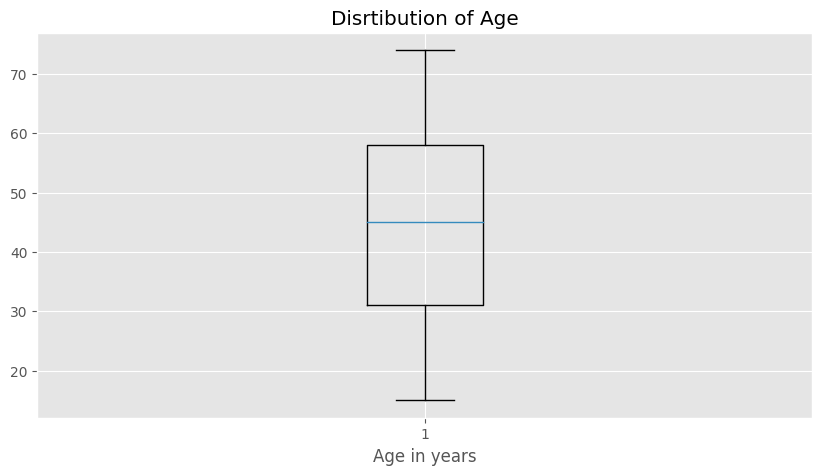

In [9]:
plt.style.use("ggplot") # hUsing ggplot graph style
plt.figure(figsize = (10 , 5))
plt.title("Disrtibution of Age")
plt.xlabel("Age in years")
plt.boxplot(drug_data["Age"]);

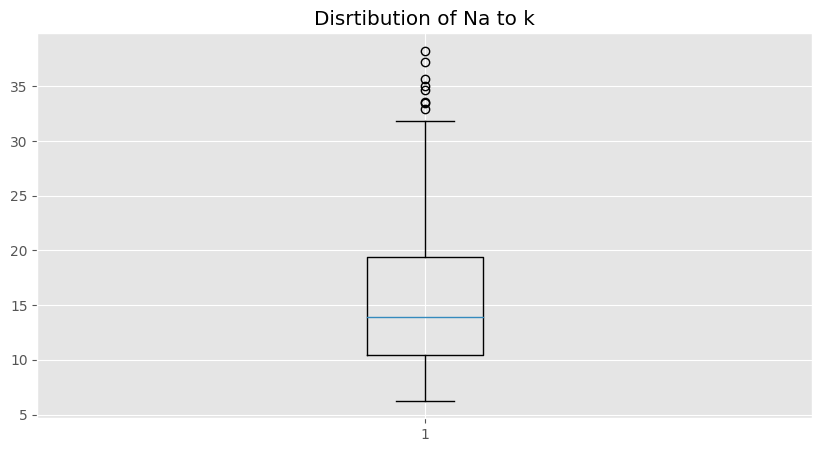

In [10]:
plt.style.use("ggplot") # Using ggplot graph style
plt.figure(figsize = (10 , 5))
plt.title("Disrtibution of Na to k")
# plt.xlabel("Age in")
plt.boxplot(drug_data["Na_to_K"]); 

## LOOKING FOR DATA IMBALANCE

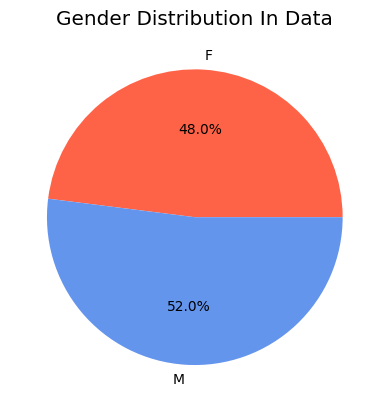

In [11]:
species = drug_data.groupby(["Sex"]).count()["Age"]
plt.title("Gender Distribution In Data")
plt.pie(species, labels = species.index, autopct='%1.1f%%', colors = [ 'tomato', 'cornflowerblue', 'gold']);

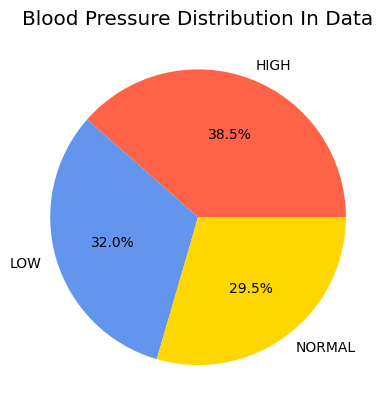

In [12]:
species = drug_data.groupby(["BP"]).count()["Age"]
plt.title("Blood Pressure Distribution In Data")
plt.pie(species, labels = species.index, autopct='%1.1f%%', colors = [ 'tomato', 'cornflowerblue', 'gold']);

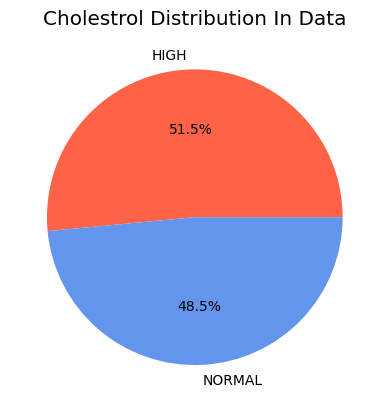

In [13]:
species = drug_data.groupby(["Cholesterol"]).count()["Age"]
plt.title("Cholestrol Distribution In Data")
plt.pie(species, labels = species.index, autopct='%1.1f%%', colors = [ 'tomato', 'cornflowerblue', 'gold']);

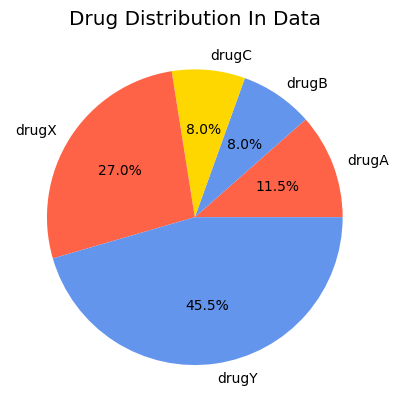

In [14]:
species = drug_data.groupby(["Drug"]).count()["Age"]
plt.title("Drug Distribution In Data")
plt.pie(species, labels = species.index, autopct='%1.1f%%', colors = [ 'tomato', 'cornflowerblue', 'gold']);

### WE CAN SEE THAT OUR DRUG COLUMN IS IMBALANCED

# ENCODING THE NON-ORDINAL DATA USING ONE HOT ENCODER

In [15]:
one_hot_encoded_data = pd.get_dummies(drug_data, columns = ["Sex"])
one_hot_encoded_data

,Age,BP,Cholesterol,Na_to_K,Drug,Sex_F,Sex_M
0,23,HIGH,HIGH,25.355,drugY,True,False
1,47,LOW,HIGH,13.093,drugC,False,True
2,47,LOW,HIGH,10.114,drugC,False,True
3,28,NORMAL,HIGH,7.798,drugX,True,False
4,61,LOW,HIGH,18.043,drugY,True,False
...,...,...,...,...,...,...,...
195,56,LOW,HIGH,11.567,drugC,True,False
196,16,LOW,HIGH,12.006,drugC,False,True
197,52,NORMAL,HIGH,9.894,drugX,False,True
198,23,NORMAL,NORMAL,14.020,drugX,False,True


# ENCODING THE ORDINAL DATA USING LABEL ENCODER

In [16]:
# Create a copy of the data
label_encoded_data = one_hot_encoded_data.copy()

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to the 'Drug' column
label_encoded_data['BP'] = label_encoder.fit_transform(label_encoded_data['BP'])
label_encoded_data['Drug'] = label_encoder.fit_transform(label_encoded_data['Drug'])

# Apply LabelEncoder to the 'Sex' column
label_encoded_data['Cholesterol'] = label_encoder.fit_transform(label_encoded_data['Cholesterol'])

label_encoded_data.head()


,Age,BP,Cholesterol,Na_to_K,Drug,Sex_F,Sex_M
0,23,0,0,25.355,4,True,False
1,47,1,0,13.093,2,False,True
2,47,1,0,10.114,2,False,True
3,28,2,0,7.798,3,True,False
4,61,1,0,18.043,4,True,False


# CORRELATION MATRIX TO FIND OUT CORRELATION BETWEEN COLUMNS

In [17]:
corr_matrix = round(label_encoded_data.corr(), 2) # Creating correlation matrix of the data columns
corr_matrix

,Age,BP,Cholesterol,Na_to_K,Drug,Sex_F,Sex_M
Age,1.00,0.05,-0.07,-0.06,-0.00,-0.10,0.10
BP,0.05,1.00,-0.14,-0.15,0.37,0.01,-0.01
Cholesterol,-0.07,-0.14,1.00,0.01,0.06,0.01,-0.01
Na_to_K,-0.06,-0.15,0.01,1.00,0.59,0.13,-0.13
Drug,-0.00,0.37,0.06,0.59,1.00,0.10,-0.10
Sex_F,-0.10,0.01,0.01,0.13,0.10,1.00,-1.00
Sex_M,0.10,-0.01,-0.01,-0.13,-0.10,-1.00,1.00


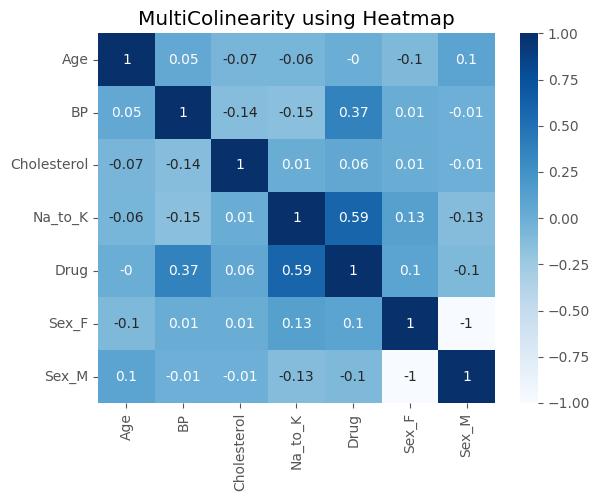

In [18]:
colormap = "Blues"
plt.title("MultiColinearity using Heatmap")
sns.heatmap(corr_matrix, cmap=colormap, annot = True);

# TRAIN TEST SPLITS

In [19]:
X = label_encoded_data.drop("Drug", axis = 1)
y = label_encoded_data[["Drug"]]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3) # Splitting the dataset into 4 parts
len(X_train), len(X_test), len(y_train), len(y_test)

(140, 60, 140, 60)

# FITTING THE MODEL ON TRAINING DATA

In [21]:
model = DecisionTreeClassifier() # Creating the object for DecisionTreeClassifier

model.fit(X_train, y_train) # Fitting the model on training data

DecisionTreeClassifier()

# MAKING PREDICTION ON TEST VALUES

In [22]:
y_preds = model.predict(X_test) # Predicting on test data after model training

# MEASUREMENT OF AN ACCURACY

In [23]:
accuracy = model.score(X_test, y_test) # Accuracy of a model
accuracy

1.0

## CLASSIFICATION REPORT

In [31]:
y_test.value_counts()

Drug
4       26
3       18
0        7
2        6
1        3
Name: count, dtype: int64

In [24]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        26

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [25]:
c_names = [str(i) for i in model.classes_]

# PLOTTING THE DECISION TREE

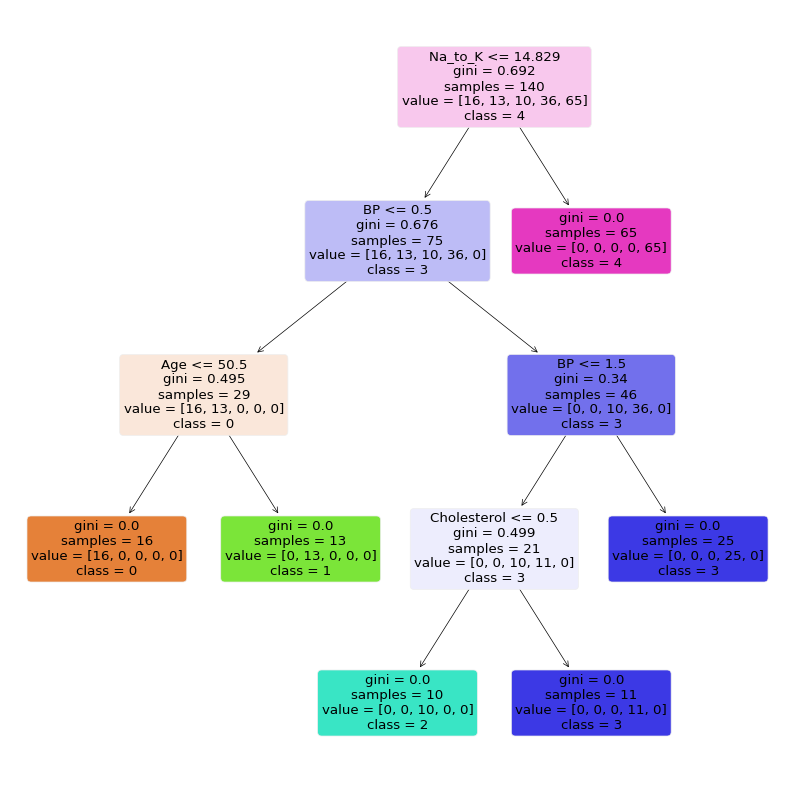

In [26]:
plt.figure(figsize=(10, 10))
plot_tree(model, filled=True, feature_names=list(X.columns), class_names=c_names, rounded=True)
plt.show()